In [1]:
import magnitude as mm 

In [2]:
stats =tb.Table.read('/home/pedro/Documents/DES/Y6/statistics.fits')

In [3]:
stats['TRIPLET'] = False
stats['TRIPLET'][(stats['d'] > 50) & (stats['PAIR_1'] < 90) & (stats['PAIR_2'] < 90)] = True
stats['TRIPLET'][(stats['d'] < 50) & (stats['PAIR_1'] < 60) & (stats['PAIR_2'] < 60)] = True
stats

ORBITID,ARC,ARCCUT,NUNIQUE,NDETECT,TRIPLET,PAIR_1,PAIR_2,d,inc,e,m_r,m_g,m_i,m_z,AMPLITUDE
int64,float64,float64,int64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
0,12.95325323441557,0.0,2,3,False,999.0,999.0,59.02192754884956,79.36859008924141,0.9127117139745403,21.309710430145667,22.211458081396792,20.98826711225835,20.852649812213226,0
1,0.0,0.0,0,0,True,0.0,0.0,51.59625711596985,96.14080569742842,0.8200542820211925,24.196406156978234,25.532753145833574,23.660712324546097,23.45489117919668,5
2,4.984409351369322,0.0,2,3,False,999.0,999.0,47.32463754585307,99.37360971742348,0.7235421843536454,21.35782286872642,22.47753523573844,20.928926436064877,20.758099783719707,2
3,0.0,0.0,0,0,True,0.0,0.0,35.20554854580355,101.35993557421968,0.7243359574668794,24.804751612352817,25.719334169681463,24.476980891284438,24.339290279840064,2
4,0.0,0.0,0,0,True,0.0,0.0,50.26423391757976,93.60306439450963,0.7525191137574135,24.86383667406015,26.337396787300975,24.260498968390763,24.032512835374355,5
5,0.009451549967707251,0.0,1,4,False,999.0,999.0,51.91808616734882,99.89565005509205,0.46168292853904663,21.919663558713438,22.36608966360791,21.822686472477617,21.760620419842,0
6,0.0,0.0,0,0,True,0.0,0.0,51.007006885454395,78.41248875269764,0.9759077885190321,23.073455024806083,24.47998102567013,22.50316406317444,22.28600641526653,2
7,21.019941926939282,12.95325323441557,7,15,True,1.9851918604326784,2.0013401007472567,52.208161907745904,78.90900095095472,0.5069846034402258,21.021750467103207,22.215534041051598,20.556338115465447,20.373546227319576,2
8,0.0,0.0,1,1,True,0.0,0.0,58.20177505816257,81.75614625847383,0.33877946936607467,21.514645194561908,22.7874059016342,21.01029838089218,20.814748768661932,2


In [4]:
def check_if_detected(population):
    '''
    Returns the ORBITIDs of each object that is detected according to the Y6 thresholds    
    '''
    st = population
    st['DETECTED'] = (st['TRIPLET']) & (st['NUNIQUE'] > 6) & (st['ARCCUT'] > 180)
    
    return st[st['DETECTED']]['ORBITID']

disc = check_if_detected(stats)

In [51]:
stats[det]

ORBITID,ARC,ARCCUT,NUNIQUE,NDETECT,TRIPLET,PAIR_1,PAIR_2,d,inc,e,m_r,m_g,m_i,m_z,AMPLITUDE,DETECTED
int64,float64,float64,int64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,bool
138,385.94223465510913,376.0136419729788,7,8,True,9.957740882610778,9.92859268213033,33.912864370818596,78.64917133900927,0.9031216786267003,20.088840813544586,20.968788856394884,19.77814435353906,19.646048495436993,0,True
173,367.0564699108072,360.06283545857514,7,8,True,44.92124829457316,6.993634452232072,31.609133342196422,79.83558039474784,0.9026831543188598,20.740775439807795,21.783612749556493,20.34977717943783,20.191368688283664,0,True
181,379.9934875736726,359.0193183082811,7,9,True,28.90454035953917,20.974169265391538,31.82109790293319,79.77273736406435,0.8526743270214968,20.791514263418385,21.86245585227115,20.38666104346162,20.223712673177662,5,True
201,343.94719961277224,320.0052868057046,8,15,True,0.8859054104595998,1.0765633703085769,52.359821036935514,78.42597793842548,0.3607175811136611,21.157061982012436,22.031476823272346,20.84909330179221,20.717891260120307,5,True
243,1802.0323774804447,1798.03955394912,9,16,True,3.9906039207198774,0.9988776303898703,50.75102827580376,89.16995030333568,0.3892669512675356,22.928933833295403,24.260314237622076,22.395688447509926,22.19066958900674,0,True
251,342.9687935226193,341.9438362025694,11,15,True,2.9932394409715926,1.0249573200499071,32.28051684818691,81.26735264163021,0.4290859850999244,22.24070797931643,22.910095552760087,22.033814459190793,21.93573189412068,0,True
258,1802.0296156303111,1797.0452062789418,10,24,True,0.9109077102748415,8.047908552777699,57.67596209754939,85.87419555749638,0.6659422871201071,20.33875619172656,20.754325995613776,20.256990767809874,20.199909147489585,0,True
270,438.90474517764414,377.0113863332617,9,9,True,0.9991182003132053,11.957237713270843,31.056398327834344,78.0671464870322,0.4340220385238496,21.18507692358687,21.88425009842606,20.96349957890642,20.860605539055427,0,True
342,350.99594926549617,327.05542656819944,9,14,True,0.10094423967984767,0.9756191306287292,46.95120260671602,84.90304299862167,0.3273762180820344,23.17898767178157,23.78211682211547,23.004758493305534,22.917379110876578,5,True


In [52]:
mm.find_m50(stats[det]['m_r'], stats[np.isin(stats['ORBITID'], det, invert=True)]['m_r'])

   direc: array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
     fun: 462803.39999999997
 message: 'Optimization terminated successfully.'
    nfev: 26
     nit: 1
  status: 0
 success: True
       x: array([23.5562306 ,  2.13352152,  2.        ])

In [24]:
stats[np.isin(stats['ORBITID'], det, invert=True)]

ORBITID,ARC,ARCCUT,NUNIQUE,NDETECT,TRIPLET,PAIR_1,PAIR_2,d,inc,e,m_r,m_g,m_i,m_z,AMPLITUDE,DETECTED
int64,float64,float64,int64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,bool
0,12.95325323441557,0.0,2,3,False,999.0,999.0,59.02192754884956,79.36859008924141,0.9127117139745403,21.309710430145667,22.211458081396792,20.98826711225835,20.852649812213226,0,False
1,0.0,0.0,0,0,False,0.0,0.0,51.59625711596985,96.14080569742842,0.8200542820211925,24.196406156978234,25.532753145833574,23.660712324546097,23.45489117919668,5,False
2,4.984409351369322,0.0,2,3,False,999.0,999.0,47.32463754585307,99.37360971742348,0.7235421843536454,21.35782286872642,22.47753523573844,20.928926436064877,20.758099783719707,2,False
3,0.0,0.0,0,0,False,0.0,0.0,35.20554854580355,101.35993557421968,0.7243359574668794,24.804751612352817,25.719334169681463,24.476980891284438,24.339290279840064,2,False
4,0.0,0.0,0,0,False,0.0,0.0,50.26423391757976,93.60306439450963,0.7525191137574135,24.86383667406015,26.337396787300975,24.260498968390763,24.032512835374355,5,False
5,0.009451549967707251,0.0,1,4,False,999.0,999.0,51.91808616734882,99.89565005509205,0.46168292853904663,21.919663558713438,22.36608966360791,21.822686472477617,21.760620419842,0,False
6,0.0,0.0,0,0,False,0.0,0.0,51.007006885454395,78.41248875269764,0.9759077885190321,23.073455024806083,24.47998102567013,22.50316406317444,22.28600641526653,2,False
7,21.019941926939282,12.95325323441557,7,15,True,1.9851918604326784,2.0013401007472567,52.208161907745904,78.90900095095472,0.5069846034402258,21.021750467103207,22.215534041051598,20.556338115465447,20.373546227319576,2,False
8,0.0,0.0,1,1,False,0.0,0.0,58.20177505816257,81.75614625847383,0.33877946936607467,21.514645194561908,22.7874059016342,21.01029838089218,20.814748768661932,2,False


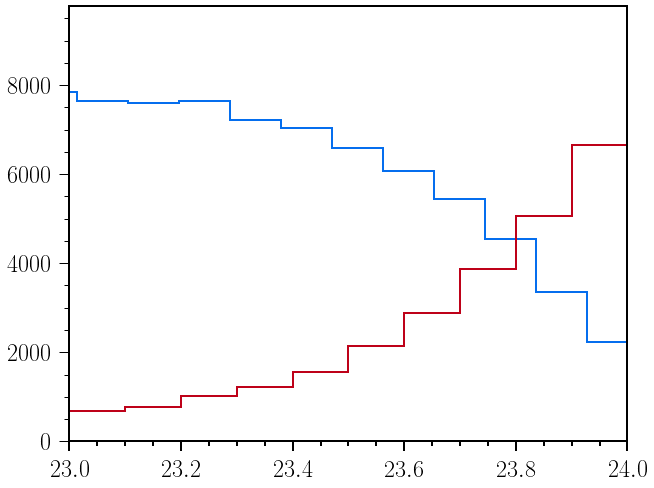

In [20]:
pl.hist(stats[det]['m_r'], bins=50, histtype='step', )
pl.hist(stats[np.isin(stats['ORBITID'], det, invert=True)]['m_r'], bins = 50, histtype='step',)
pl.xlim(23,24)
pl.show()

In [5]:
def detprob(m, params):
    '''
    logit function
    params = (m0, k, c)
    '''
    m50, k, c = params
    logit = c/(1+np.exp(k*(m-m50)))
    return logit

def detprobossos(m, params):
    '''
    logit function
    params = (m0, k, c)
    '''
    m50, k, c, d = params
    logit = c/(1+np.exp(k*(m-m50))) * (1/(1+ np.exp(d * (m - m50))))
    return logit


def minusLogP(params, mdet, mnon, res_collect, f = detprob):
    '''
    Takes logit parameters and list of detected and non-detected magnitudes. 
    Returns negative log of pdf
    '''
    if params[2] > 1.:
        # this ensures that c cannot continue to rise above 1 by referencing 
        # the value of the previous trial in the optimizer
        res_collect.append(res_collect[-1] + (params[2] - 1.)*1e5)
        return res_collect[-1] + 1e7
    elif params[2] <= 0.:
        return res_collect[-1] + 1e7
    else:
        pdet = f(mdet,params)
        pnon = f(mnon,params)    
        result = np.sum(np.log(pdet))
        result += np.sum(np.log(1-pnon))
        return -result


In [6]:
res_co = [0]
from scipy.optimize import minimize
s = minimize(minusLogP, (23, 6.5,1,1), method='Powell', 
         args=(stats[disc]['m_r'], stats[np.logical_not(stats['DETECTED'])]['m_r'], res_co, detprobossos), tol=1e-5)
sn = minimize(minusLogP, (23, 6.5,1), method='Powell', 
         args=(stats[disc]['m_r'], stats[np.logical_not(stats['DETECTED'])]['m_r'], res_co, detprob), tol=1e-5)

In [7]:
sn.x

array([23.77259782,  6.33659918,  0.94395722])

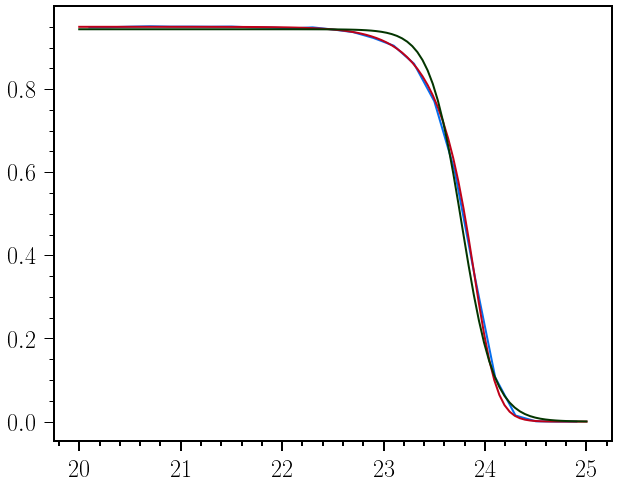

In [77]:
det, bins = np.histogram(stats[disc]['m_r'], bins=25, range=(20,25))
ndet, bins = np.histogram(stats['m_r'], bins=25, range=(20,25))
pl.plot(bins[0:-1] + (bins[1] - bins[0])/2, det/ndet)
pl.plot(np.linspace(20,25,100), detprobossos(np.linspace(20, 25, 100), s.x))
pl.plot(np.linspace(20,25,100), detprob(np.linspace(20, 25, 100), sn.x))

pl.show()

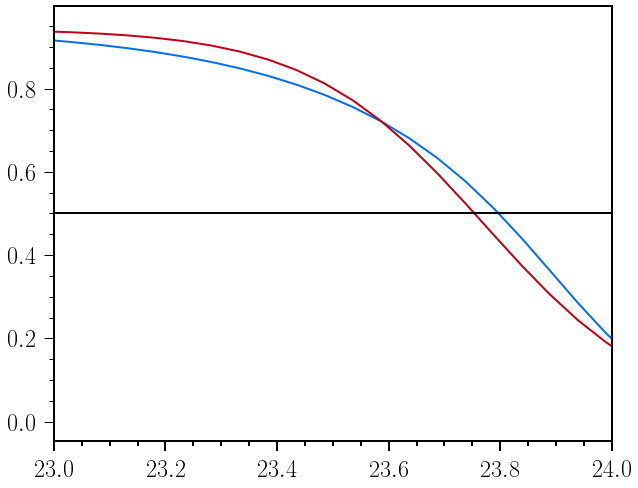

In [82]:
pl.plot(np.linspace(20,25,100), detprobossos(np.linspace(20, 25, 100), s.x))
pl.plot(np.linspace(20,25,100), detprob(np.linspace(20, 25, 100), sn.x))
pl.axhline(0.5)
pl.xlim(23, 24)
pl.show()

In [83]:
s.x

array([23.97145861,  8.63121025,  0.94983068,  3.39285899])

In [54]:
res_co = [0]
from scipy.optimize import minimize
minimize(minusLogP, (23, 6.5,1), method='Powell', 
         args=(stats[det]['m_g'], stats[np.logical_not(stats['DETECTED'])]['m_g'], res_co), tol=1e-5)

<ipython-input-43-902cb65ab010>:27: RuntimeWarning: divide by zero encountered in log
  result += np.sum(np.log(1-pnon))


   direc: array([[ 3.74551382e-02,  3.42698354e-01, -5.46454177e-03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.21238304e-03,  8.94452719e-03,  2.38582038e-05]])
     fun: 136024.91855805492
 message: 'Optimization terminated successfully.'
    nfev: 222
     nit: 5
  status: 0
 success: True
       x: array([24.70699927,  3.57328317,  0.94951042])

In [55]:
res_co = [0]
from scipy.optimize import minimize
minimize(minusLogP, (23, 6.5,1), method='Powell', 
         args=(stats[det]['m_i'], stats[np.logical_not(stats['DETECTED'])]['m_i'], res_co), tol=1e-5)

   direc: array([[ 5.15174127e-02,  1.07818368e+00, -8.52402948e-03],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 5.27305467e-04, -1.94872867e-02, -1.78621375e-04]])
     fun: 115242.25252338537
 message: 'Optimization terminated successfully.'
    nfev: 222
     nit: 5
  status: 0
 success: True
       x: array([23.42434371,  5.91396932,  0.94449503])

In [56]:
res_co = [0]
from scipy.optimize import minimize
minimize(minusLogP, (23, 6.5,1), method='Powell', 
         args=(stats[det]['m_z'], stats[np.logical_not(stats['DETECTED'])]['m_z'], res_co), tol=1e-5)

   direc: array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.047222  ,  0.87528674, -0.00768796]])
     fun: 118224.39859950451
 message: 'Optimization terminated successfully.'
    nfev: 174
     nit: 4
  status: 0
 success: True
       x: array([23.27747237,  5.43952901,  0.94529905])

In [89]:
reload(mm)

<module 'magnitude' from '/home/pedro/Dropbox/DES/DESTNOSIM/tno/magnitude.py'>

In [91]:
mm.find_m50(stats[disc]['m_r'], stats[np.isin(stats['ORBITID'], disc, invert = True)]['m_r'], mm.detprob_double, (23,1,5,5))

   direc: array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.15690296, -0.00874258,  0.07447872,  0.01465218]])
     fun: 112354.3530530535
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 2
  status: 0
 success: True
       x: array([23.95990812,  0.94673187,  5.89123211,  4.58374045])

In [92]:
mm.find_m50(stats[disc]['m_r'], stats[np.isin(stats['ORBITID'], disc, invert = True)]['m_r'], mm.detprob_logit, (23,1,5))

   direc: array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ],
       [ 0.18075374, -0.01378557, -0.18075373]])
     fun: 113001.36879827555
 message: 'Optimization terminated successfully.'
    nfev: 97
     nit: 3
  status: 0
 success: True
       x: array([23.77269031,  0.94219779,  6.36621618])

In [8]:
amp = {}
for i in [0,2,5]:
    st = stats[stats['AMPLITUDE'] == i]
    st_d = st[np.isin(st['ORBITID'], disc)]
    st_n = st[np.isin(st['ORBITID'], disc, invert=True)]
    det, bins = np.histogram(st_d['m_r'], bins=25, range=(20,25))
    ndet, bins = np.histogram(st['m_r'], bins=25, range=(20,25))
    amp[i] = det/ndet
    print(mm.find_m50(st_d['m_r'], st_n['m_r'], mm.detprob_double, (23,1,5,5)).x)

[23.95314611  0.94699398  6.16038924  4.60929982]
[23.9600501   0.94606353  5.69434625  4.65461651]
[23.9737134   0.94599378  4.85640498  4.98639584]


In [10]:
dist =  {}
for i in [45,60,90,500]:
    st = stats[stats['d'] < i]
    st_d = st[np.isin(st['ORBITID'], disc)]
    st_n = st[np.isin(st['ORBITID'], disc, invert=True)]
    det, bins = np.histogram(st_d['m_r'], bins=25, range=(20,25))
    ndet, bins = np.histogram(st['m_r'], bins=25, range=(20,25))
    dist[i] = det/ndet
    print(mm.find_m50(st_d['m_r'], st_n['m_r'], mm.detprob_double, (23,1,5,5)).x)

[23.95583187  0.93301012  3.82570622  6.37625275]
[23.95972072  0.94634007  5.77736078  4.62774846]
[23.95975664  0.94636522  5.77961126  4.6271072 ]
[23.9596175   0.94654093  5.83251965  4.62181084]


In [11]:
inc = {}
for i in [10,20,50, 90]:
    st = stats[stats['inc'] < i]
    st_d = st[np.isin(st['ORBITID'], disc)]
    st_n = st[np.isin(st['ORBITID'], disc, invert=True)]
    det, bins = np.histogram(st_d['m_r'], bins=25, range=(20,25))
    ndet, bins = np.histogram(st['m_r'], bins=25, range=(20,25))
    inc[i] = det/ndet
    print(mm.find_m50(st_d['m_r'], st_n['m_r'], mm.detprob_double, (23,1,5,5)).x)

[23.85724268  0.94025309  4.6051494   5.26825609]
[23.8760028   0.93951024  3.0451071   8.45202687]
[23.89580248  0.94184229  4.41389927  5.28361119]
[23.94768811  0.94686291  5.36264328  4.68277624]


In [12]:
color = {}
for i in [0.4, 0.7, 1.0, 1.3]:
    st = stats[stats['m_g'] - stats['m_r'] < i + 0.3]
    st = stats[stats['m_g'] - stats['m_r'] > i]
    st_d = st[np.isin(st['ORBITID'], disc)]
    st_n = st[np.isin(st['ORBITID'], disc, invert=True)]
    det, bins = np.histogram(st_d['m_r'], bins=25, range=(20,25))
    ndet, bins = np.histogram(st['m_r'], bins=25, range=(20,25))
    color[i] = det/ndet
    print(mm.find_m50(st_d['m_r'], st_n['m_r'], mm.detprob_double, (23,1,5,5)).x)

[23.95990812  0.94673187  5.89123211  4.58374045]
[23.97467656  0.94700089  5.95653558  4.55963007]
[24.00604639  0.94585382  5.94200348  4.6201889 ]
[24.04584595  0.94301861  6.42349403  4.79210019]


In [13]:
p = np.linspace(20,25,100)
mag = detprob(p, sn.x)
bins = bins[0:-1] + (bins[1] - bins[0])/2

In [19]:
amp_label = {0 : 'Constant light curve', 2 : r'$A = 0.2 \, \mathrm{mag}$', 5 : r'$A = 0.5 \, \mathrm{mag}$'}
inc_label = {10 : r'$i < 10^\circ$', 20 : r'$i < 20^\circ$', 50 : r'$i < 50^\circ$', 90 : r'$i < 90^\circ$'}
color_label = {0.4 : r'$0.4 < g - r < 0.7$', 0.7 : r'$0.7 < g - r <1.0$', 1.0 : r'$1.0 < g - r < 1.3$', 1.3 : r'$1.3 < g - r < 1.5$'}
dist_label = {45 : r'$d < 45 \, \mathrm{au}$', 60 : r'$d < 60 \, \mathrm{au}$', 90 : r'$d < 90 \, \mathrm{au}$', 500 : r'$d < 500 \, \mathrm{au}$'}

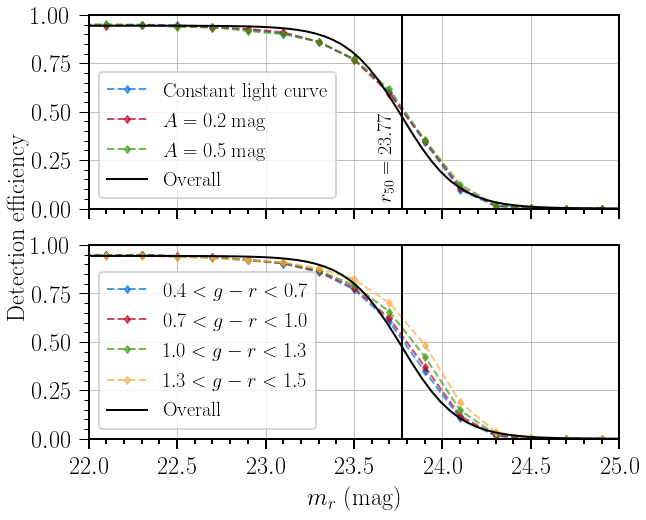

In [74]:
fig = pl.figure()

fig.set_size_inches(10,8)
pl.subplot(2,1,1)
for i in amp:
        pl.plot(bins, amp[i], '--d', label=amp_label[i], alpha=0.7)
pl.plot(p, mag, 'k-', label = 'Overall')
pl.legend()
pl.grid()
pl.xticks(np.arange(22,25.5,0.5), [])
pl.xlim(22,25)
pl.ylim(0,1)
pl.axvline(23.77)
pl.annotate('$r_{50} = 23.77$', xy=(23.65,0.05), fontsize=20, rotation=90)
pl.subplot(2,1,2)
for i in color:
    pl.plot(bins, color[i], '--d', label=color_label[i], alpha=0.7)
pl.grid()
pl.xticks(np.arange(22,25.5, 0.5))
pl.plot(p, mag, 'k-', label = 'Overall')
pl.legend()
pl.xlim(22,25)
pl.ylim(0,1)
pl.axvline(23.77)
fig.add_subplot(111, frameon=False)
pl.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
pl.xticks([])
pl.yticks([])
pl.ylabel('Detection efficiency', labelpad=60)
pl.xlabel(r'$m_r$ (mag)', labelpad=50)
pl.tight_layout()
pl.savefig('m50_phot.pdf')
pl.show()

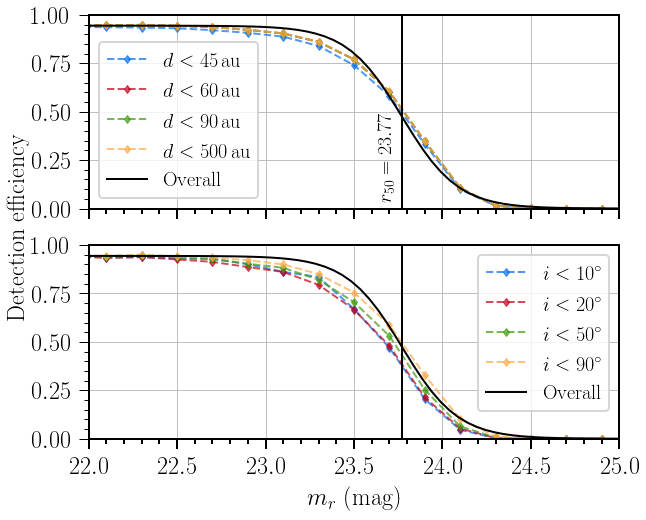

In [73]:
fig = pl.figure()

fig.set_size_inches(10,8)
pl.subplot(2,1,1)
for i in dist:
        pl.plot(bins, dist[i], '--d', label=dist_label[i], alpha=0.7)
pl.plot(p, mag, 'k-', label = 'Overall')
pl.legend()
pl.grid()
pl.xticks(np.arange(22,25.5,0.5), [])
pl.xlim(22,25)
pl.ylim(0,1)
pl.axvline(23.77)
pl.annotate('$r_{50} = 23.77$', xy=(23.65,0.05), fontsize=20, rotation=90)
pl.subplot(2,1,2)
for i in inc:
    pl.plot(bins, inc[i], '--d', label=inc_label[i], alpha=0.7)
pl.grid()
pl.xticks(np.arange(22,25.5, 0.5))
pl.plot(p, mag, 'k-', label = 'Overall')
pl.legend()
pl.xlim(22,25)
pl.ylim(0,1)
pl.axvline(23.77)
fig.add_subplot(111, frameon=False)
pl.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
pl.xticks([])
pl.yticks([])
pl.ylabel('Detection efficiency', labelpad=60)
pl.xlabel(r'$m_r$ (mag)', labelpad=50)
pl.tight_layout()
pl.savefig('m50_orb.pdf')
pl.show()